**Due Date: Monday, November 23rd, 11:59pm**

- Save a copy of the notebook to your Google Drive. You can do that by going to the menu and clicking `File` > `Save` > `SAVE A COPY IN DRIVE`.
- Fill out the missing parts and run the code modules.
- Answer the questions (if any) in a separate document or by adding a new `Text` block inside the Colab.
- Download the solved notebook by going to the menu and clicking `File` > `Download .ipynb`.
- Make sure the downloaded version is showing your solutions.
- Upload your solutions to CCLE (under "Colab Assignment #5: Prediction - Classification" for Week 7).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

np.random.seed(0)

We are going to work with a dataset of credit card defaults in Taiwan. You can check the original dataset [here](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). We download a cleaned and slightly modified version of this dataset to use here.


In [2]:
!wget -O credit_card_defaults_clean.csv https://www.dropbox.com/s/xy1jbcrfbj8lqps/credit_card_default_clean.csv?dl=0

--2020-11-24 02:40:07--  https://www.dropbox.com/s/xy1jbcrfbj8lqps/credit_card_default_clean.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/xy1jbcrfbj8lqps/credit_card_default_clean.csv [following]
--2020-11-24 02:40:08--  https://www.dropbox.com/s/raw/xy1jbcrfbj8lqps/credit_card_default_clean.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7e4d2206522f241e87451b047f.dl.dropboxusercontent.com/cd/0/inline/BDzkMn1wThRlzCDGrdV-EEHxUN5IRHyCLR6Gs9_RaOMGlJzP6UuN1tpqkXoXuS1Jwn0mlJppgwsjGsRtUWE50ygRyU8MxGmGVrrC8RZODe_mh4GYzQNGNRKUaW5nkXe65AI/file# [following]
--2020-11-24 02:40:08--  https://uc7e4d2206522f241e87451b047f.dl.dropboxusercontent.com/cd/0/inline/BDzkMn1wThRlzCDGrdV-EEHxUN5IRHyCLR6Gs9_RaOMGlJzP6UuN1tpqkX

Load the data.

In [3]:
default_data = pd.read_csv("./credit_card_defaults_clean.csv")

print("The first three rows of the data are:")
default_data.head(3)

The first three rows of the data are:


,limit_bal,sex,education,marriage,age,last_payment,last_balance,default
0,20000,female,university,married,24,0,3913,1
1,120000,female,university,single,26,0,2682,1
2,90000,female,university,single,34,1518,29239,0


We are going to use this dataset to predict the probability of default for a credit card customer based on the features in our data.

## Preprocessing data

Separate features and label into two different variables.

In [4]:
# TODO: Assign the right values to X and y
X = default_data.drop(labels='default', axis=1)
y = default_data.default
# END OF TODO

print("shape of X is: ", X.shape)
print("shape of y is: ", y.shape)

shape of X is:  (29601, 7)
shape of y is:  (29601,)


Convert categorical features to 0-1 indicator variables.

In [5]:
# TODO: Update X
X = pd.get_dummies(
    data=X, 
    columns=['sex', 'education', 'marriage'], 
    drop_first=True
)
# END OF TODO

print("The first three rows for the features are:")
X.head(3)

The first three rows for the features are:


,limit_bal,age,last_payment,last_balance,sex_male,education_high school,education_others,education_university,marriage_others,marriage_single
0,20000,24,0,3913,0,0,0,1,0,0
1,120000,26,0,2682,0,0,0,1,0,1
2,90000,34,1518,29239,0,0,0,1,0,1


Divide the data into train-validation-test datasets using 80%-10%-10% split.

In [6]:
# TODO: Assign the right values to X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_val_test, y_train, y_val_test = train_test_split(
    X,
    y,
    test_size=0.2,
    shuffle=True,
    random_state=0
)

X_val, X_test, y_val, y_test = train_test_split(
    X_val_test,
    y_val_test,
    test_size=0.5,
    shuffle=True,
    random_state=0
)
# END OF TODO

print("shape of X_train is: ", X_train.shape)
print("shape of X_val is: ", X_val.shape)
print("shape of X_test is: ", X_test.shape)

shape of X_train is:  (23680, 10)
shape of X_val is:  (2960, 10)
shape of X_test is:  (2961, 10)


##Logistic Regression (Linear Model)

Use the logistic regression to develop a model for predicting default on credit card loan based on the observed data.

In [7]:
from sklearn.linear_model import LogisticRegression

# TODO: Fit a logistic regression model with L-1 regularization to the data
#       Use 1.0 for the regularization parameter (C = 1.0)
model_lr = LogisticRegression(
    solver='liblinear',
    penalty='l1',
    C=1.0
)
model_lr.fit(X_train, y_train)
# END OF TODO

preds_train = model_lr.predict(X_train)
preds_val = model_lr.predict(X_val)
print("First four 0-1 predictions for the validation set:")
print(preds_val[0:4])

probs_train = model_lr.predict_proba(X_train)[:, 1]
probs_val = model_lr.predict_proba(X_val)[:, 1]
print("First four predicted probabilities for positive label in the validation set:")
print(probs_val[0:4])

First four 0-1 predictions for the validation set:
[0 0 0 0]
First four predicted probabilities for positive label in the validation set:
[0.30186048 0.17359243 0.17113821 0.26530508]


Let's look at the coefficients in the logistic regression model:

In [8]:
print("intercept: ", model_lr.intercept_[0])
for feature, coef in zip(X_train.columns, model_lr.coef_[0]):
    print(feature, ":", coef)

intercept:  -0.7930045105475702
limit_bal : -3.298660449793991e-06
age : 0.0035675149982054848
last_payment : -2.638546514041504e-05
last_balance : 1.5395523612427846e-06
sex_male : 0.16207543823228462
education_high school : 0.010763256319760819
education_others : -1.1399870030050172
education_university : 0.023683048189479916
marriage_others : -0.06292221049839333
marriage_single : -0.2005529505514575


How can you interpret the value of the coefficient for `last_payment`?

_Answer_: For a one-unit increase in `last payment`, while all other features remain the same, the expected change in the odds of the sample belonging to one class or the other is $e^{-2.6\text{e}-5}$, which is approximately equal to 1. 

Let's check the confusion matrix in the training data if we use 0-1 predictions from the model (using 0.5 as the probability threshold):

In [9]:
confusion_matrix_train = metrics.confusion_matrix(y_train, preds_train)
print("Confusion matrix for the training set:")
print(confusion_matrix_train)

Confusion matrix for the training set:
[[18342     0]
 [ 5338     0]]


What are the values in each cell in this confusion matrix correspond to? Based on this confusion matrix, do you think these predictions from the model are useful at all?

_Answer_: The top left corner is the number of true negatives, the top right corner is the number of false positive, the bottom left corner is the number of false negatives, and the bottom right corner is the number of true positives. The predictions from the model are not very useful because they classify all the samples as belonging to one class only. 

Now, let's use 0.2 as the probability threshold, assign positive prediction if the prediction probability was > 0.2, and compute the confusion matrix again.

In [10]:
confusion_matrix_train = metrics.confusion_matrix(y_train, probs_train > 0.2)
print("Confusion matrix for the training set:")
print(confusion_matrix_train)

Confusion matrix for the training set:
[[ 7273 11069]
 [ 1157  4181]]


What is the number of false positives in the training set for this model?

_Answer_: The number of false positives in the training set for this model is 11069.

To measure the performance of the model independent of the probability threshold, let' look at the AUC of the model in the training and validation sets:

In [11]:
fpr, tpr, thresholds = metrics.roc_curve(y_train, probs_train)
auc_train = metrics.auc(fpr, tpr)
print("AUC of the model in the training set is: ", auc_train)

fpr, tpr, thresholds = metrics.roc_curve(y_val, probs_val)
auc_val = metrics.auc(fpr, tpr)
print("AUC of the model in the validation set is: ", auc_val)

AUC of the model in the training set is:  0.6383688479319228
AUC of the model in the validation set is:  0.6227321425133197


Based on these metrics, do you see any overfitting to the training data in this model?

_Answer_: Yes, but since it is relatively small we can still consider the model as usable/functional.

##Decision Tree (Non-linear Model)

This time, let's apply a decision tree model to the classification problem.

In [12]:
from sklearn import tree

# TODO: Fit a decision tree to the data
#       Use cross-entropy for the split
#       Use 3 as the maximum depth of the tree
#       Use 100 as minimum number of samples for a split at a node
#       Don't forget to set the random_state to 0.
model_dt = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=100,
    random_state=0
)
model_dt.fit(X_train, y_train)
# END OF TODO

preds_train = model_dt.predict(X_train)
preds_val = model_dt.predict(X_val)
print("First four 0-1 predictions for the validation set:")
print(preds_val[0:4])

probs_train = model_dt.predict_proba(X_train)[:, 1]
probs_val = model_dt.predict_proba(X_val)[:, 1]
print("First four predicted probabilities for positive label in the validation set:")
print(probs_val[0:4])

First four 0-1 predictions for the validation set:
[0 0 0 0]
First four predicted probabilities for positive label in the validation set:
[0.49553571 0.11384181 0.17715232 0.23006177]


Let's draw the tree to see what is happening inside the fitted model.

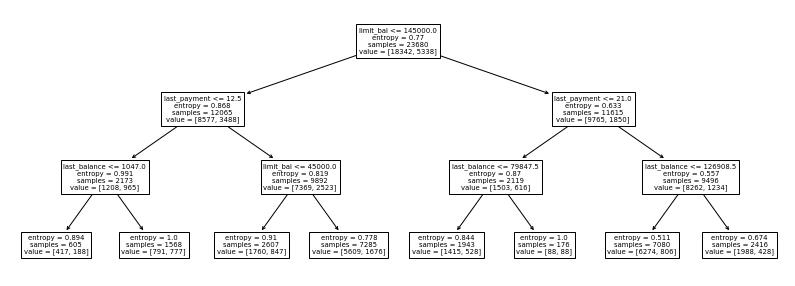

In [13]:
plt.rcParams['figure.figsize'] = [14, 5]
tree.plot_tree(model_dt, 
               feature_names=X_train.columns)
plt.show()

Based on the diagram, which feature is splitted at the root of the tree?

_Answer_: The feature that is used to generate the first split is `limit_bal`.

Next, let's compute the AUC of this model.

In [14]:
# TODO: Assign the correct values to auc_train and auc_val
fpr_train, tpr_train, thresholds = metrics.roc_curve(
    y_train, probs_train, pos_label=1
)

fpr_val, tpr_val, thresholds = metrics.roc_curve(
    y_val, probs_val, pos_label=1
)

auc_train = metrics.auc(fpr_train, tpr_train)
auc_val = metrics.auc(fpr_val, tpr_val)
# END OF TODO

print("AUC of the model in the training set is: ", auc_train)
print("AUC of the model in the validation set is: ", auc_val)

AUC of the model in the training set is:  0.6570252164047332
AUC of the model in the validation set is:  0.6388784213841495


Is this model performing better in the prediction task over the validation set compared to logistic regression?

_Answer_: the decision tree model performs a better on the validation set than the logistic classification model.

##Out-of-sample Validation

Finally, let's estimate the prediction error of the best model for new data by using the test set.

In [15]:
# TODO: Assign the correct values to auc_test
pred_prob_test = model_dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(
    y_test, pred_prob_test, pos_label=1
)
auc_test = metrics.auc(fpr, tpr)
# END OF TODO

print("AUC of the model in the test set is: ", auc_test)

AUC of the model in the test set is:  0.6439497395937931


Apply the following code to draw the ROC curve for the model in the test set.

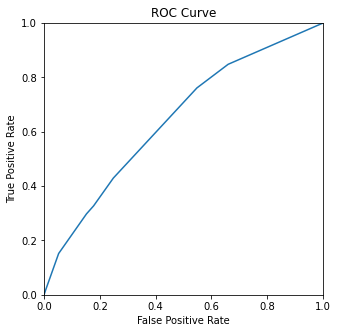

In [16]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()